In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("monthly-cola-production-in-austr.csv")

In [5]:
df

,Month,Monthly cola production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [10]:
df['Month'] = pd.to_datetime(df['Month'])

In [12]:
df.set_index('Month', inplace = True)

In [14]:
df

,Monthly cola production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


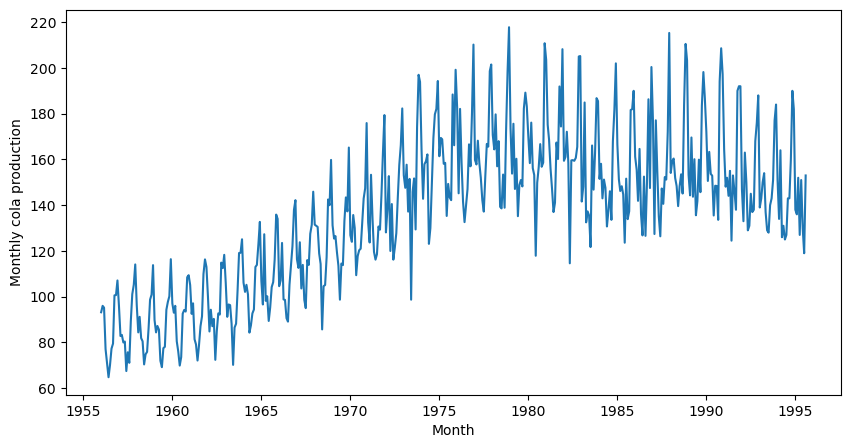

In [17]:
plt.figure(figsize = (10,5))
sns.lineplot(df, x = df.index, y = 'Monthly cola production')
plt.show()

In [20]:
df['rollMean'] = df['Monthly cola production'].rolling(window = 12 ).mean()
df['rollStd'] = df['Monthly cola production'].rolling(window = 12 ).std()

<Axes: xlabel='Month', ylabel='Monthly cola production'>

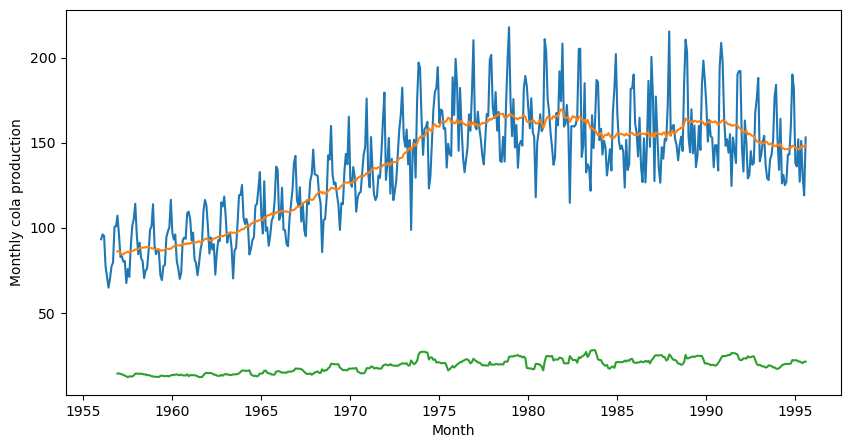

In [23]:
plt.figure(figsize = (10,5))
sns.lineplot(data = df , x = df.index, y = 'Monthly cola production')
sns.lineplot(data = df , x = df.index, y = df.rollMean)
sns.lineplot(data = df , x = df.index, y = df.rollStd)

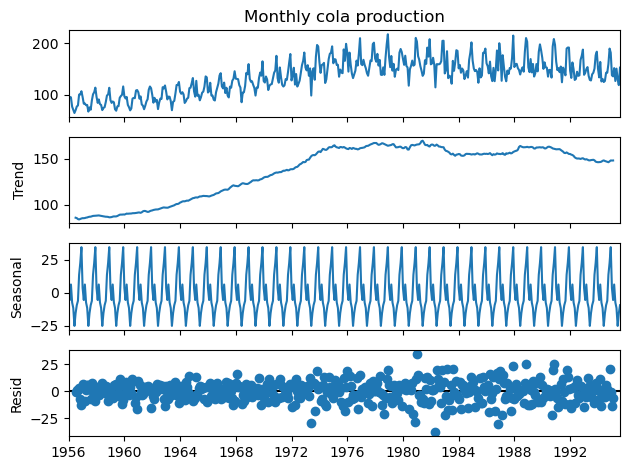

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Monthly cola production'], period = 12)

fig = decomposition.plot()

In [32]:
from statsmodels.tsa.stattools import adfuller

In [98]:
def test_stationarity(dataFrame1, var):
    # dataFrame1 = dataFrame.copy()
    dataFrame1['rollMean'] = dataFrame1[var].rolling(window = 12).mean()
    dataFrame1['rollStd'] = dataFrame1[var].rolling(window = 12).std()

    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame1[var])
    stats = pd.Series(adfTest[0:4], index = ['Test Statistic', 'p-value', '#lags used', 'number of observation used'])
    print(stats)

    for key, values in adfTest[4].items():
            print('criticality',key,":",values)
    
    sns.lineplot(data = dataFrame1, x = dataFrame1.index, y = var)
    sns.lineplot(data = dataFrame1, x = dataFrame1.index, y = 'rollMean')
    sns.lineplot(data = dataFrame1, x = dataFrame1.index, y = 'rollStd')
    plt.show()

            Monthly cola production  rollMean  rollStd  shift  shiftDiff
Month                                                                   
1956-01-01                     93.2       NaN      NaN    NaN        NaN
1956-02-01                     96.0       NaN      NaN   93.2        2.8
1956-03-01                     95.2       NaN      NaN   96.0       -0.8
1956-04-01                     77.1       NaN      NaN   95.2      -18.1
1956-05-01                     70.9       NaN      NaN   77.1       -6.2
Test Statistic                 -4.915560
p-value                         0.000033
#lags used                     18.000000
number of observation used    446.000000
dtype: float64
criticality 1% : -3.4450973903602367
criticality 5% : -2.868042229965336
criticality 10% : -2.570233448893


C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_13980\731359150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame1['rollMean'] = dataFrame1[var].rolling(window = 12).mean()
C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_13980\731359150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame1['rollStd'] = dataFrame1[var].rolling(window = 12).std()


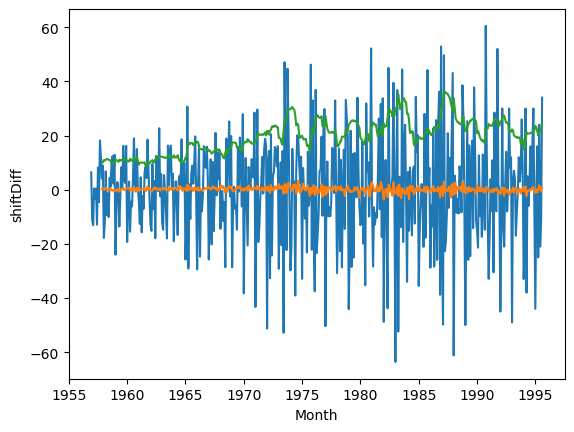

In [100]:
df['shift'] = df['Monthly cola production'].shift(1)
df['shiftDiff'] = df['Monthly cola production'] - df['shift']
print(df.head())

test_stationarity(df.dropna(), 'shiftDiff')

# arima

In [110]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [112]:
df['firstDiff'] = df['Monthly cola production'].diff()
df['Diff12'] = df['Monthly cola production'].diff(12)


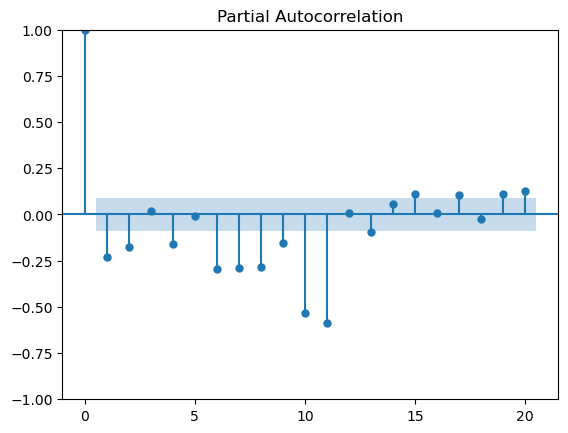

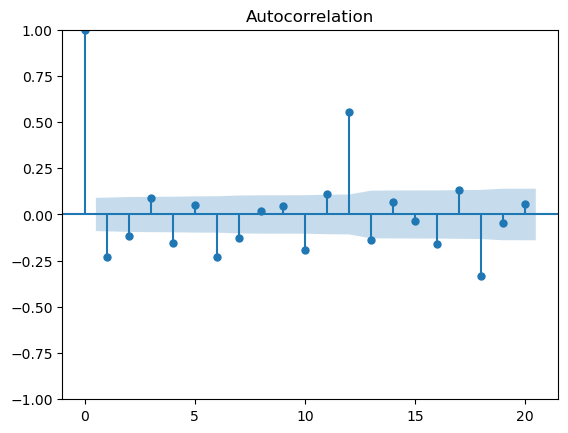

In [116]:
plot_pacf(df['firstDiff'].dropna(), lags = 20)
plt.show()
plot_acf(df['firstDiff'].dropna(), lags = 20)
plt.show()